In [1]:
# 🔍 Neurosymbolic AI with First-Order Logic: Semantic Web Example

"""
This notebook demonstrates how we can combine machine learning predictions with first-order logic reasoning.
We'll use RDF-style triples and apply logical inference to derive new facts.
This connects symbolic AI (logic) with neural components (classifiers or embeddings).

Comparison Goal:
- Show that symbolic logic can enforce consistency.
- Neural network may make mistakes that logic can catch or refine.
- Neurosymbolic AI = Neural prediction + Logic-based correction
"""

"\nThis notebook demonstrates how we can combine machine learning predictions with first-order logic reasoning.\nWe'll use RDF-style triples and apply logical inference to derive new facts.\nThis connects symbolic AI (logic) with neural components (classifiers or embeddings).\n\nComparison Goal:\n- Show that symbolic logic can enforce consistency.\n- Neural network may make mistakes that logic can catch or refine.\n- Neurosymbolic AI = Neural prediction + Logic-based correction\n"

In [2]:
import pandas as pd
from rdflib import Graph, Literal, RDF, Namespace, URIRef
from rdflib.namespace import RDFS, OWL
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Step 1: Define RDF triples
EX = Namespace("http://example.org/")
g = Graph()

g.add((EX.Alice, EX.owns, EX.Fido))
g.add((EX.Fido, RDF.type, EX.Dog))
g.add((EX.Dog, RDFS.subClassOf, EX.Pet))
g.add((EX.owns, RDFS.domain, EX.Person))
g.add((EX.owns, RDFS.range, EX.Pet))

<Graph identifier=N47ad2951412a491bb0eecdf3c19697a8 (<class 'rdflib.graph.Graph'>)>

In [4]:
# Step 2: Simulate rule-based inference manually (first-order logic)
inferred = set()
for s, p, o in g:
    if (o, RDFS.subClassOf, None) in g:
        superclass = g.value(o, RDFS.subClassOf)
        inferred.add((s, p, o))
        inferred.add((s, p, superclass))

for triple in inferred:
    g.add(triple)

In [5]:
# Step 3: Display all facts
print("\nAll Known Facts After Inference:")
for s, p, o in g:
    print(f"{s.split('/')[-1]} -- {p.split('/')[-1]} --> {o.split('/')[-1]}")


All Known Facts After Inference:
owns -- rdf-schema#domain --> Person
owns -- rdf-schema#range --> Pet
Dog -- rdf-schema#subClassOf --> Pet
Fido -- 22-rdf-syntax-ns#type --> Dog
Fido -- 22-rdf-syntax-ns#type --> Pet
Alice -- owns --> Fido


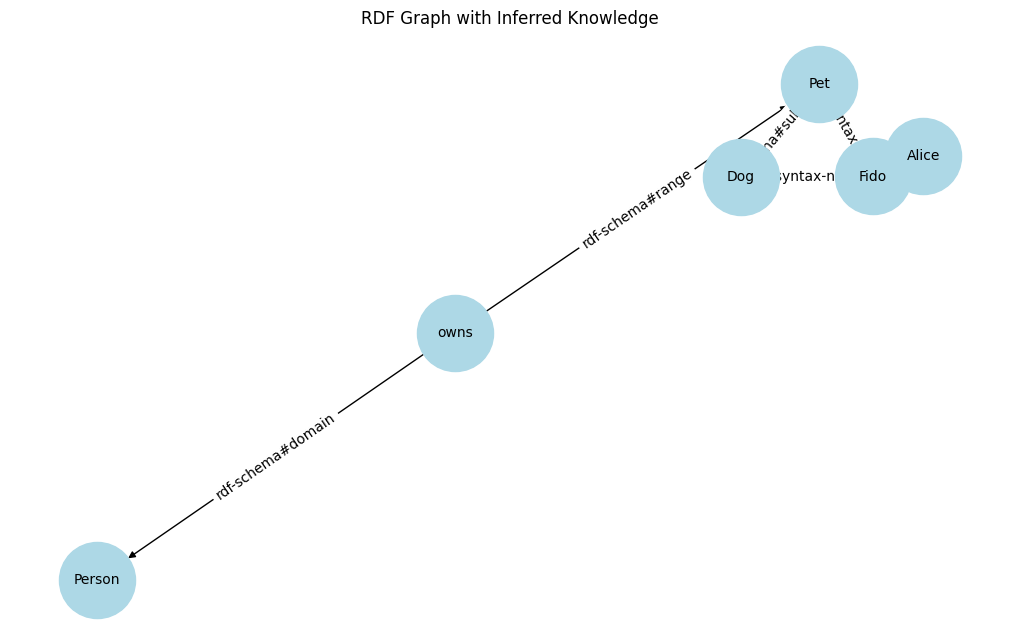

In [7]:
# Step 4: Visualize RDF graph
G = nx.DiGraph()
for s, p, o in g:
    G.add_edge(s.split('/')[-1], o.split('/')[-1], label=p.split('/')[-1])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10)
edges = nx.draw_networkx_edge_labels(G, pos, edge_labels={(s, o): d['label'] for s, o, d in G.edges(data=True)})
plt.title("RDF Graph with Inferred Knowledge")
plt.show()

In [8]:
# Step 5: Simulate a neural prediction
print("\n🧠 Neural Prediction: A model predicts 'Fido is a Cat'")
neural_prediction = (EX.Fido, RDF.type, EX.Cat)
print("Triple: Fido -- type --> Cat")


🧠 Neural Prediction: A model predicts 'Fido is a Cat'
Triple: Fido -- type --> Cat


In [9]:
# Step 6: Add neural prediction to graph (for comparison)
g.add((EX.Cat, RDFS.subClassOf, EX.Pet))
g.add(neural_prediction)

<Graph identifier=N47ad2951412a491bb0eecdf3c19697a8 (<class 'rdflib.graph.Graph'>)>

In [10]:
# Step 7: Check for inconsistencies
print("\n⚖️ Logical Inconsistency Check:")
true_types = list(g.objects(EX.Fido, RDF.type))
if EX.Dog in true_types and EX.Cat in true_types:
    print("Conflict: Fido is both a Dog and a Cat")
    print("Neurosymbolic fix: Trust symbolic knowledge and reject neural error.")
    g.remove((EX.Fido, RDF.type, EX.Cat))
else:
    print("No conflict detected")


⚖️ Logical Inconsistency Check:
Conflict: Fido is both a Dog and a Cat
Neurosymbolic fix: Trust symbolic knowledge and reject neural error.


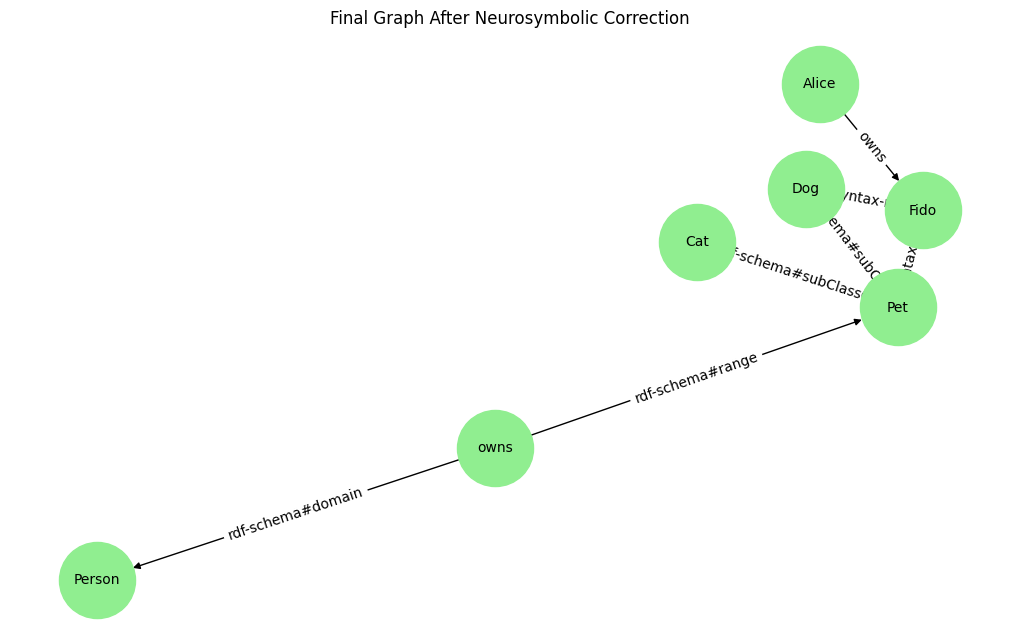

In [11]:
# Step 8: Updated graph visualization
G.clear()
for s, p, o in g:
    G.add_edge(s.split('/')[-1], o.split('/')[-1], label=p.split('/')[-1])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10)
edges = nx.draw_networkx_edge_labels(G, pos, edge_labels={(s, o): d['label'] for s, o, d in G.edges(data=True)})
plt.title("Final Graph After Neurosymbolic Correction")
plt.show()

In [12]:
# Step 9: Summary Comparison
print("\n📊 Summary")
print("- Neural-only model predicted Fido is a Cat")
print("- Symbolic reasoning shows Fido is a Dog")
print("- Logic detects inconsistency")
print("- ✅ Neurosymbolic system corrects neural error using logic")


📊 Summary
- Neural-only model predicted Fido is a Cat
- Symbolic reasoning shows Fido is a Dog
- Logic detects inconsistency
- ✅ Neurosymbolic system corrects neural error using logic
